# Imports

## Install dependencies if you don't have them
As it needs c++ build tools on windows it's easier to install on linux os.

In [2]:
%%capture
!python3 -m pip install cvxpy
!python3 -m pip install numpy
!python3 -m pip install matplotlib

In [20]:
%matplotlib inline
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Max-Min Fair
As we had in lectures we should convert it to linear-fractional problem by inversing the objective function and changing the order of max-min to min-max.

In [2]:
K = 4
G = 1/100*np.array([[37, 2, 1, 6], [10, 30, 3, 6], [1, 14, 354, 3], [10, 8, 6, 171]], dtype=float)
sigma = np.ones((K,))
p = cp.Variable((K,), nonneg=True)

numerators = []
for i in range(K):
    numerator_i = [G[i, k]*p[k] for k in range(K) if i != k]
    numerators.append(cp.sum(cp.hstack(numerator_i)))
numerators = sigma + cp.hstack(numerators)
denominators = cp.multiply(cp.diag(G), p)
isinr = numerators/denominators
    
constraints = []
constraints.append(p<=30)



In [5]:
objective = cp.Minimize(cp.max(isinr))
problem = cp.Problem(objective, constraints)
problem.solve(qcp=True)
print(p.value)

[16.11128432 29.99998682  4.38789886  8.52961947]


# Part 2: Circles

In [6]:
# data
m = 14 # circles count
n = 4 # permenant circles count
lim = 10 # used to define one axis of center of the permenant circles
C = np.array([[-lim, 0], [0, -lim], [0, lim], [lim, 0]]) # permenant circles center
R = [2]*n # permenant circles radius

I = np.array([[ 0, 13],[ 1,  7],[ 1, 12],[ 2, 11],[ 3, 12],[ 4,  5],[ 4,  9],[ 5,  8],[ 5,  9],[ 5, 11],[ 6, 10],[ 6, 12],[ 7, 13],[ 8, 13],[10, 11],[10, 12]])

In [7]:
centers = cp.Variable((m,2))
radiuses = cp.Variable((m,), nonneg=True)

constraints = []
for i in range(n):
    constraints.append(centers[i] == C[i])
    constraints.append(radiuses[i] == R[i])

for el in I:
    i = el[0]
    j = el[1]
    constraints.append(radiuses[i]+radiuses[j] >= cp.norm(centers[i]-centers[j]))

In [8]:
circumferences = 2 * np.pi * radiuses
areas = np.pi * cp.power(radiuses, 2)

In [46]:
problem1 = cp.Problem(cp.Minimize(cp.sum(circumferences)), constraints)
problem1.solve()

139.34597715733548

In [57]:
print(centers.value)
print(radiuses.value)

[[-1.00000000e+01  1.02403714e-11]
 [ 3.91128852e-11 -1.00000000e+01]
 [-1.32197317e-11  1.00000000e+01]
 [ 1.00000000e+01 -1.35865059e-12]
 [-1.22225356e+00  1.77457796e+00]
 [-1.22225356e+00  1.77457796e+00]
 [ 1.22239296e+00  1.77460181e+00]
 [-8.80912670e-01 -8.20445184e+00]
 [-1.22225359e+00  1.77457788e+00]
 [-1.22225356e+00  1.77457796e+00]
 [ 1.22239296e+00  1.77460183e+00]
 [ 4.05502730e-05  4.76729690e+00]
 [ 3.29157448e+00 -3.29157447e+00]
 [-3.29155720e+00 -3.29155710e+00]]
[2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 0.00000000e+00 4.91786489e-08 0.00000000e+00 3.72476491e-08
 3.37342056e-09 0.00000000e+00 4.11881354e-09 3.23270305e+00
 5.47244503e+00 5.47245290e+00]


Plotting the circles

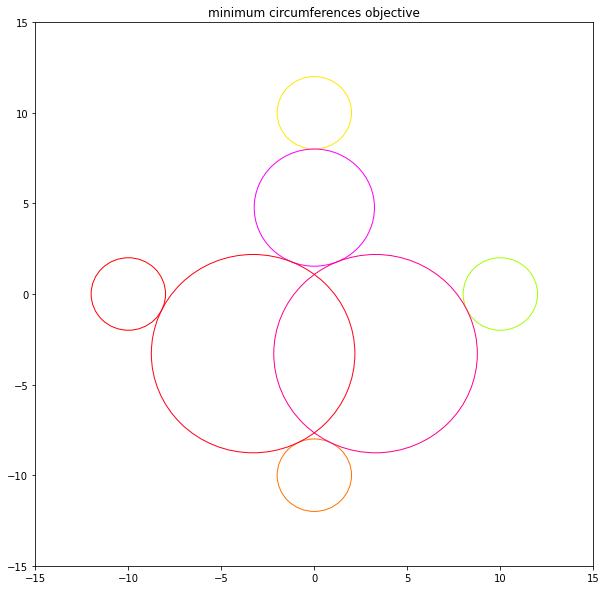

In [50]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(radiuses.shape[0])
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.cla() # clear things for fresh plot
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))

for i, (center, radius) in enumerate(zip(centers, radiuses)):
    ax.add_artist(plt.Circle(center.value, radius.value, color=cmap(i), fill=False))
plt.title('minimum circumferences objective')
plt.show()

In [54]:
sum_surcum = sum([2*np.pi*r.value for r in radiuses])
print(f'some of circumferences is {sum_surcum}')


some of circumferences is 139.34597724521257


In [55]:
problem2 = cp.Problem(cp.Minimize(cp.sum(areas)), constraints)
problem2.solve()

210.76672207140646

In [59]:
print(centers.value)
print(radiuses.value)

[[-1.00000000e+01 -4.73578071e-14]
 [ 7.53398453e-14 -1.00000000e+01]
 [-9.05967932e-14  1.00000000e+01]
 [ 1.00000000e+01 -2.10467361e-13]
 [-2.10207592e+00  2.72084854e+00]
 [-2.10207591e+00  2.72084854e+00]
 [ 2.13026420e+00  5.49402380e-01]
 [-2.57941815e+00 -6.46503555e+00]
 [-3.36267440e+00  9.72744120e-01]
 [-2.10207592e+00  2.72084854e+00]
 [ 1.52505657e+00  1.94305866e+00]
 [-4.90402009e-02  5.56784610e+00]
 [ 4.18715919e+00 -4.18715919e+00]
 [-5.67096579e+00 -2.22822307e+00]]
[2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 1.28212342e-04 1.07761055e+00 3.02187121e-04 2.37599948e+00
 1.07761048e+00 1.28212345e-04 1.51939271e+00 2.43242518e+00
 5.16389699e+00 2.86883099e+00]


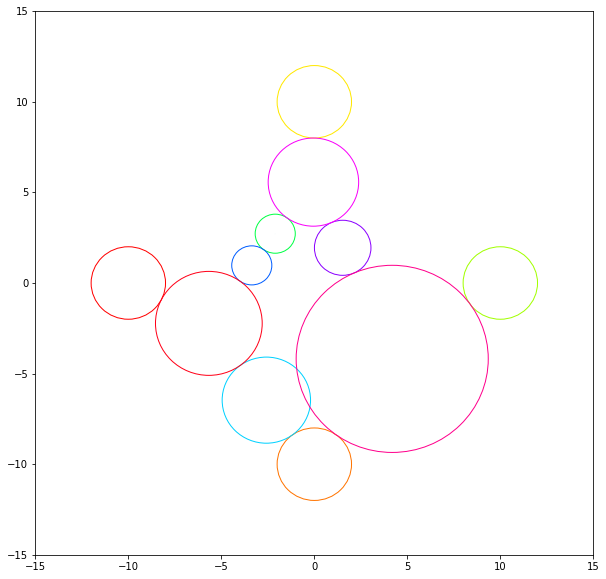

In [44]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(radiuses.shape[0])
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.cla() # clear things for fresh plot
ax.set_xlim((-15, 15))
ax.set_ylim((-15, 15))

for i, (center, radius) in enumerate(zip(centers, radiuses)):
    ax.add_artist(plt.Circle(center.value, radius.value, color=cmap(i), fill=False))

plt.show()

In [56]:
sum_areas = sum([np.pi*r.value**2 for r in radiuses])
print(f'some of areas is {sum_areas}')

some of areas is 210.76672519234964


# Part 3

In [57]:
M = 120 # length of p
G = 60 # location of barrier
F = 30 # upto which the pathes should be same
h = 0.5 # height of each section
p1 = p2 = pN_1 = pN = 0.3


In [108]:
A = np.zeros((M, M), dtype=float)
A[0,0] = 1
A[1,1] = 5
A[M-1, M-1] = 1
A[M-2, M-2] = 5
A[0,1] = -4
A[M-2, M-1] = -4

for i in range(2, M-2):
    A[i,i] = 6

for i in range(1, M-2):
    A[i,i+1] = -8

for i in range(0, M-2):
    A[i,i+2] = 2

A = (A + A.T)/2


v1 = cp.Variable(M, name='p1')
v2 = cp.Variable(M, name='p2')
v3 = cp.Variable(M, name='p3')

constraints = []
constraints.append(v1[0]==p1)
constraints.append(v1[1]==p2)
constraints.append(v1[M-2]==pN_1)
constraints.append(v1[M-1]==pN)

constraints.append(v2[0]==p1)
constraints.append(v2[1]==p2)
constraints.append(v2[M-2]==pN_1)
constraints.append(v2[M-1]==pN)

constraints.append(v3[0]==p1)
constraints.append(v3[1]==p2)
constraints.append(v3[M-2]==pN_1)
constraints.append(v3[M-1]==pN)

constraints.append(v1<=1)
constraints.append(v2<=1)
constraints.append(v3<=1)

constraints.append(-1<=v1)
constraints.append(-1<=v2)
constraints.append(-1<=v3)

for i in range(F):
    constraints.append(v1[i]==v2[i])
    constraints.append(v2[i]==v3[i])

constraints.append(v1[G] >= 0.5)
constraints.append(v2[G] <= -0.5)

In [111]:
objectives = [cp.quad_form(v1, A), cp.quad_form(v2, A), cp.quad_form(v3, A)]

objective = cp.Minimize(cp.sum(cp.hstack(objectives)))
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS)

0.00020174736197328623

In [114]:
print(v1.value)
print(v2.value)
print(v3.value)
print(v1.value[G])
print(v2.value[G])

[ 0.3         0.3         0.29956883  0.29872101  0.2974712   0.29583407
  0.29382438  0.29145685  0.28874627  0.28570742  0.28235507  0.27870404
  0.27476914  0.27056517  0.26610695  0.26140929  0.25648702  0.25135496
  0.24602793  0.24052077  0.2348483   0.22902537  0.22306681  0.21698746
  0.21080215  0.20452573  0.19817304  0.19175891  0.1852982   0.17880574
  0.16983951  0.15855061  0.14509014  0.12960922  0.11225894  0.09319041
  0.07255474  0.05050303  0.02718639  0.00275592 -0.02263728 -0.0488421
 -0.07570744 -0.10308221 -0.1308153  -0.15875562 -0.18675208 -0.21465359
 -0.24230907 -0.26956744 -0.29627761 -0.32228853 -0.34744914 -0.37160838
 -0.39461522 -0.41631864 -0.43656763 -0.45521121 -0.47209841 -0.48707831
 -0.50000001 -0.51071264 -0.51928462 -0.5257844  -0.53028046 -0.53284132
 -0.53353551 -0.5324316  -0.52959815 -0.52510377 -0.51901705 -0.51140662
 -0.50234109 -0.49188912 -0.48011932 -0.46710036 -0.45290088 -0.43758955
 -0.42123501 -0.40390593 -0.38567099 -0.36659885 -0.

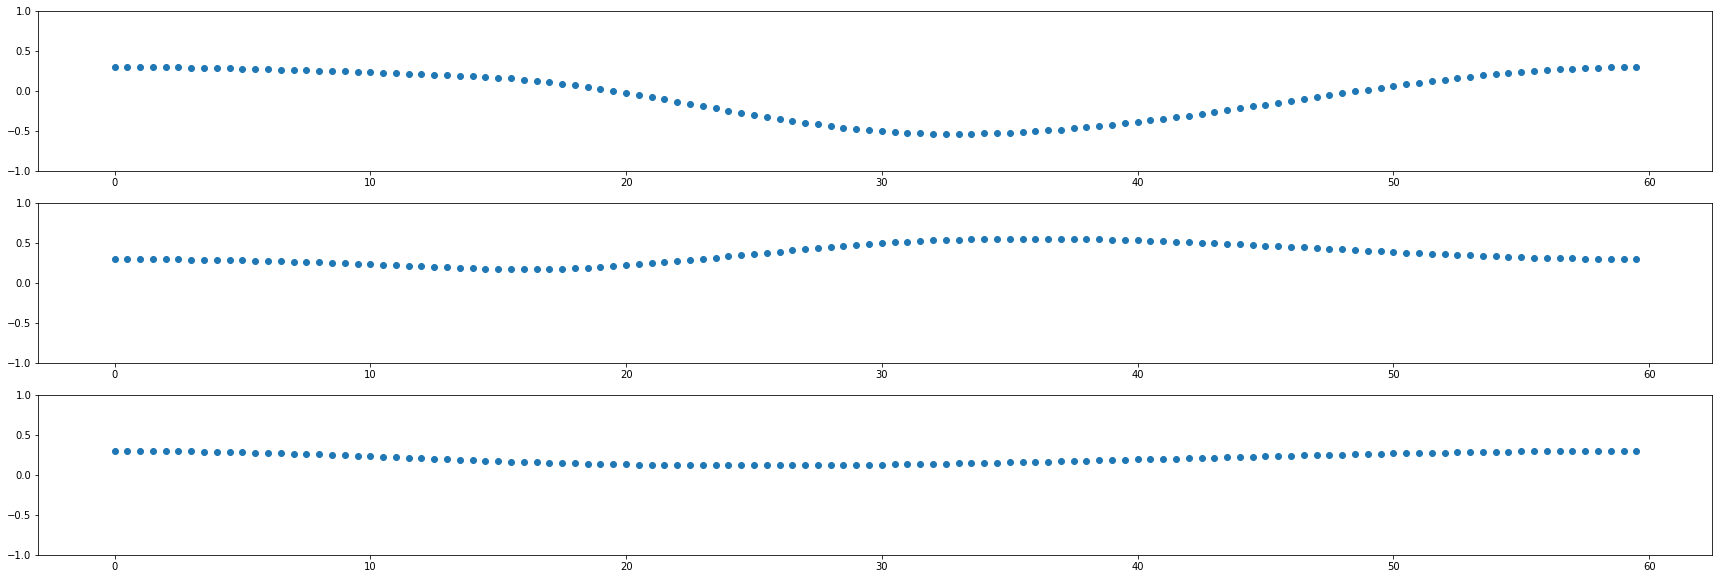

In [124]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(30, 10)

xs = np.arange(0, 60, 0.5)

ax[0].set_ylim((-1, 1))
ax[1].set_ylim((-1, 1))
ax[2].set_ylim((-1, 1))

ax[0].scatter(xs,v1.value)
ax[1].scatter(xs,v2.value)
ax[2].scatter(xs,v3.value)
plt.show()


